<h1> Intro </h1>

<b> Questions to answer: </b>
- How has Spain overall changed since I left in 2016?
- How has Asturias and Oviedo specifically changed since I left?
- Compare the evolution of factors in Spain/Asturias/Oviedo to the same evolution in the Netherlands/Noord Brabant/Eindhoven
- What was the rate of immigration to Spain then and now? i.e. is it now any easier for a non-EU immigrant to get a job there?

<b> Development of Spain, 2016-Present, Time Series </b>

Factors to consider:
- Unemployment, total and by age group
- Life expectancy
- PIb por habitante
- Average income per person (Renta media por persona)
- Average rent per square meter (Oviedo specific, still haven't found)
- Consumer price index
- Poverty rate
- Number of non-EU immigrants
- Number of Spanish emigrants (and locations ?)

<b> Comparison of Spain vs. the Netherlands over same period </b>

Factors to consider:
- Same as above
- Air pollution
- Violencia de genero/ violencia domestica
- Turismo

<b> Data Source: </b>



In [1]:
## Import needed files

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

s_national = pd.read_csv('spain_national2.csv', sep=';')

s_national.head()

poblacion = pd.read_csv('poblacion_SEN.csv', sep=';', encoding='latin-1', thousands='.', decimal=',')

migracion = pd.read_csv('SaldoM_Comunidad.csv', sep=';', encoding='utf-8', thousands='.', decimal=',')
##https://www.ine.es/dynt3/inebase/index.htm?padre=3694&capsel=3682

inmigracion = pd.read_csv('FlujoInmigracion_delExtranjero.csv', sep=';', encoding='utf-8', thousands='.', decimal=',')

emigracion = pd.read_csv('FlujoEmigracion_alExtranjero.csv', sep=';', encoding='utf-8', thousands='.', decimal=',')

paro = pd.read_csv('INE_paro_comunidad.csv', sep=';', encoding='latin-1', thousands='.', decimal=',')
## Unemployment data for people 25 and over


<h1> Population Data Prep </h1>

In [2]:
poblacion.columns

Index(['Provincias', 'Grupo quinquenal de edad', 'Nacionalidad', 'Sexo',
       'Periodo', 'Total'],
      dtype='object')

In [3]:
## Clean poopulation time series data

poblacion['Provincias'] = poblacion['Provincias'].str[3:]

poblacion.drop(['Grupo quinquenal de edad','Sexo'], axis=1, inplace=True)

## Convert Periodo column to date_time formate for sorting

period_list = list(poblacion['Periodo'].unique())

period_list
period_list_1 = [i.replace('1 de julio de ', '07-') for i in period_list]
period_list_2 = [i.replace('1 de enero de ', '01-') for i in period_list_1]

period_columns = dict(zip(period_list,period_list_2))

poblacion['Periodo'] = poblacion['Periodo'].replace(period_columns)

poblacion['Periodo'] = pd.to_datetime(poblacion['Periodo'], format='%m-%Y')

poblacion_sorted = poblacion.sort_values(by=['Periodo'])

In [4]:
poblacion_sorted

,Provincias,Nacionalidad,Periodo,Total
20033,Melilla,De Oceanía,2002-01-01,0.0
2057,Asturias,De Africa,2002-01-01,1035.0
18059,Valencia/València,De Sudamérica,2002-01-01,29606.0
11969,Málaga,De Centro América y Caribe,2002-01-01,898.0
8441,Granada,País de la UE28 sin España,2002-01-01,5299.0
...,...,...,...,...
7518,Cuenca,De Oceanía,2022-07-01,4.0
16632,Tarragona,Total,2022-07-01,828810.0
630,Albacete,De Sudamérica,2022-07-01,7004.0
7560,Gipuzkoa,Total,2022-07-01,714907.0


In [5]:
p_pivot = pd.pivot_table(poblacion_sorted, values='Total', index=['Provincias', 'Nacionalidad'],
                    columns=['Periodo'], aggfunc=np.sum)

p_pivot.to_excel('Poblacion_Pivoted.xlsx')

In [6]:
## The 'al Nacional' is caused by removing the first three charactaers from all values in the column
## in order to get rid of the numbers that were in front of the pronvince names
## SHOULD FIX

nacional_poblacion = p_pivot.loc['al Nacional']

nacional_poblacion

Periodo,2002-01-01,2002-07-01,2003-01-01,2003-07-01,2004-01-01,2004-07-01,2005-01-01,2005-07-01,2006-01-01,2006-07-01,...,2018-01-01,2018-07-01,2019-01-01,2019-07-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2022-01-01,2022-07-01
Nacionalidad,,,,,,,,,,,,,,,,,,,,,
De Africa,364732.0,411641.0,458708.0,500486.0,542089.0,580300.0,642147.0,701485.0,739425.0,775375.0,...,929166.0,941879.0,970736.0,999963.0,1034164.0,1048242.0,1051711.0,1043088.0,1053593.0,1048848.0
De América del Norte,28530.0,31102.0,34583.0,37049.0,39516.0,40756.0,43097.0,44263.0,45240.0,44979.0,...,68010.0,69012.0,74844.0,76398.0,82718.0,82595.0,85072.0,83928.0,89410.0,89769.0
De Asia,80773.0,95827.0,110387.0,124583.0,138086.0,154538.0,175710.0,197568.0,209891.0,220616.0,...,368726.0,379507.0,396160.0,408410.0,423531.0,427476.0,429751.0,423919.0,426450.0,419757.0
De Centro América y Caribe,68392.0,74897.0,80491.0,85761.0,91561.0,95841.0,102675.0,108661.0,115063.0,122218.0,...,225513.0,244274.0,269743.0,299531.0,328360.0,345227.0,349339.0,346587.0,351344.0,367183.0
De Oceanía,1506.0,1656.0,1790.0,1892.0,1954.0,2051.0,2166.0,2293.0,2389.0,2538.0,...,4318.0,4460.0,4745.0,4884.0,5195.0,5275.0,5446.0,5427.0,5466.0,5549.0
De Sudamérica,603294.0,751247.0,866524.0,985372.0,1061569.0,1108230.0,1178933.0,1237372.0,1277451.0,1329280.0,...,773513.0,816516.0,880719.0,953997.0,1043169.0,1099655.0,1108577.0,1088746.0,1131867.0,1255509.0
Española,39297299.0,39364640.0,39465808.0,39548800.0,39646666.0,39747771.0,39866131.0,39950570.0,40079053.0,40201609.0,...,42095485.0,42072481.0,42096853.0,42084025.0,42105708.0,42031269.0,42030424.0,42006546.0,42025402.0,42035087.0
País de la UE28 sin España,519880.0,607624.0,709090.0,800077.0,901588.0,996848.0,1137910.0,1262324.0,1375111.0,1490169.0,...,1930904.0,1933484.0,1966630.0,1995954.0,2019486.0,0.0,0.0,0.0,0.0,0.0
Total,41035271.0,41423520.0,41827836.0,42196231.0,42547454.0,42859172.0,43296335.0,43662613.0,44009969.0,44360521.0,...,46658447.0,46728814.0,46937060.0,47105358.0,47332614.0,47355685.0,47398695.0,47331302.0,47432893.0,47615034.0


In [7]:
## Calculate each population category as a percentage of the total population for each time period

## Calculate another row that is 'Total Foreign Nationalities'
    

In [8]:
asturias_poblacion = p_pivot.loc['Asturias']

asturias_poblacion

Periodo,2002-01-01,2002-07-01,2003-01-01,2003-07-01,2004-01-01,2004-07-01,2005-01-01,2005-07-01,2006-01-01,2006-07-01,...,2018-01-01,2018-07-01,2019-01-01,2019-07-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2022-01-01,2022-07-01
Nacionalidad,,,,,,,,,,,,,,,,,,,,,
De Africa,1035.0,1236.0,1380.0,1497.0,1631.0,1815.0,2047.0,2378.0,2575.0,2629.0,...,4996.0,5076.0,5125.0,5304.0,5483.0,5589.0,5673.0,5672.0,5543.0,5596.0
De América del Norte,526.0,564.0,611.0,627.0,680.0,669.0,687.0,684.0,689.0,694.0,...,1070.0,1086.0,1161.0,1192.0,1283.0,1302.0,1352.0,1357.0,1367.0,1420.0
De Asia,354.0,414.0,457.0,508.0,558.0,629.0,714.0,857.0,1008.0,1134.0,...,2486.0,2492.0,2546.0,2592.0,2654.0,2657.0,2553.0,2512.0,2515.0,2536.0
De Centro América y Caribe,1404.0,1472.0,1526.0,1612.0,1712.0,1812.0,1903.0,1976.0,2059.0,2149.0,...,3160.0,3287.0,3467.0,3781.0,4117.0,4322.0,4392.0,4473.0,4427.0,4696.0
De Oceanía,16.0,17.0,19.0,18.0,19.0,22.0,22.0,24.0,28.0,29.0,...,72.0,76.0,82.0,83.0,89.0,87.0,85.0,83.0,83.0,86.0
De Sudamérica,6124.0,7504.0,8511.0,9490.0,10201.0,10550.0,11028.0,11500.0,11767.0,12192.0,...,9810.0,10309.0,10869.0,12039.0,13358.0,14361.0,14610.0,14552.0,14856.0,17121.0
Española,1048566.0,1045612.0,1043860.0,1041968.0,1040573.0,1039065.0,1037992.0,1036043.0,1035519.0,1034378.0,...,987262.0,983255.0,980404.0,976396.0,973029.0,968171.0,964942.0,961055.0,958361.0,954295.0
País de la UE28 sin España,4081.0,4503.0,5066.0,5507.0,6005.0,6496.0,7222.0,7913.0,8630.0,9373.0,...,16973.0,16780.0,16660.0,16681.0,16822.0,0.0,0.0,0.0,0.0,0.0
Total,1062796.0,1062103.0,1062320.0,1062196.0,1062408.0,1062146.0,1062755.0,1062559.0,1063488.0,1063801.0,...,1027624.0,1024192.0,1022205.0,1020039.0,1018899.0,1015454.0,1012889.0,1008875.0,1006234.0,1005397.0


<h2> Population Data Viz </h2>

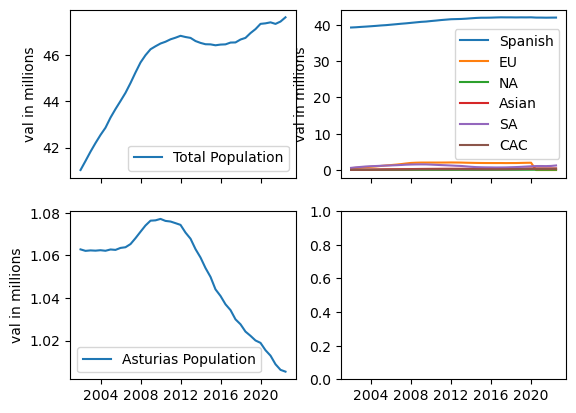

<Figure size 8000x8000 with 0 Axes>

In [9]:
## Visualizing national population and certain population categories

import matplotlib.ticker as ticker

fig, axs = plt.subplots(2,2, sharex=True)

plt.figure(figsize=(80, 80))



x = nacional_poblacion.columns

y1 = nacional_poblacion.loc['Total', :]

axs[0, 0].plot(x, y1, label='Total Population')

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
axs[0,0].yaxis.set_major_formatter(ticks_y)
axs[0,0].set_ylabel('val in millions')
## Solution used: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions

axs[0, 0].legend()


y2 = nacional_poblacion.loc['Española', :]
y3 = nacional_poblacion.loc['País de la UE28 sin España', :]
y4 = nacional_poblacion.loc['De América del Norte', :]
y5 = nacional_poblacion.loc['De Asia', :]
y6 = nacional_poblacion.loc['De Sudamérica', :]
y7 = nacional_poblacion.loc['De Centro América y Caribe', :]


axs[0, 1].plot(x, y2, label='Spanish')
axs[0, 1].plot(x, y3, label='EU')
axs[0, 1].plot(x, y4, label='NA')
axs[0, 1].plot(x, y5, label='Asian')
axs[0, 1].plot(x, y6, label='SA')
axs[0, 1].plot(x, y7, label='CAC')

axs[0,1].yaxis.set_major_formatter(ticks_y)
axs[0,1].set_ylabel('val in millions')

axs[0, 1].legend()

y8 = asturias_poblacion.loc['Total', :]

x2 = asturias_poblacion.columns

axs[1,0].plot(x, y8, label='Asturias Population')
axs[1,0].yaxis.set_major_formatter(ticks_y)
axs[1,0].set_ylabel('val in millions')

axs[1,0].legend()



<h1>Migration Data Prep </h1>

In [10]:
migracion.columns

Index(['Comunidades y ciudades autónomas', 'Sexo', 'Nacionalidad',
       'Grupo quinquenal de edad', 'Periodo', 'Total'],
      dtype='object')

In [11]:
migracion.dtypes

Comunidades y ciudades autónomas    object
Sexo                                object
Nacionalidad                        object
Grupo quinquenal de edad            object
Periodo                              int64
Total                               object
dtype: object

In [12]:
migracion['Comunidades y ciudades autónomas'].value_counts()

Total Nacional                    2520
01 Andalucía                      2520
18 Ceuta                          2520
17 Rioja, La                      2520
16 País Vasco                     2520
15 Navarra, Comunidad Foral de    2520
14 Murcia, Región de              2520
13 Madrid, Comunidad de           2520
12 Galicia                        2520
11 Extremadura                    2520
10 Comunitat Valenciana           2520
09 Cataluña                       2520
08 Castilla - La Mancha           2520
07 Castilla y León                2520
06 Cantabria                      2520
05 Canarias                       2520
04 Balears, Illes                 2520
03 Asturias, Principado de        2520
02 Aragón                         2520
19 Melilla                        2520
Name: Comunidades y ciudades autónomas, dtype: int64

In [13]:
migracion['Periodo'].value_counts()

2021    3600
2020    3600
2019    3600
2018    3600
2017    3600
2016    3600
2015    3600
2014    3600
2013    3600
2012    3600
2011    3600
2010    3600
2009    3600
2008    3600
Name: Periodo, dtype: int64

In [14]:
migracion.head()

,Comunidades y ciudades autónomas,Sexo,Nacionalidad,Grupo quinquenal de edad,Periodo,Total
0,Total Nacional,Ambos sexos,Total,Total,2021,148.070
1,Total Nacional,Ambos sexos,Total,Total,2020,219.357
2,Total Nacional,Ambos sexos,Total,Total,2019,454.232
3,Total Nacional,Ambos sexos,Total,Total,2018,334.158
4,Total Nacional,Ambos sexos,Total,Total,2017,163.272


In [15]:
migracion.rename(columns={migracion.columns[0]: "Comunidad" }, inplace = True)

In [16]:
migracion['Comunidad'].value_counts()

Total Nacional                    2520
01 Andalucía                      2520
18 Ceuta                          2520
17 Rioja, La                      2520
16 País Vasco                     2520
15 Navarra, Comunidad Foral de    2520
14 Murcia, Región de              2520
13 Madrid, Comunidad de           2520
12 Galicia                        2520
11 Extremadura                    2520
10 Comunitat Valenciana           2520
09 Cataluña                       2520
08 Castilla - La Mancha           2520
07 Castilla y León                2520
06 Cantabria                      2520
05 Canarias                       2520
04 Balears, Illes                 2520
03 Asturias, Principado de        2520
02 Aragón                         2520
19 Melilla                        2520
Name: Comunidad, dtype: int64

In [17]:
migracion['Comunidad'] = migracion['Comunidad'].str[3:]

migracion.drop(['Grupo quinquenal de edad','Sexo'], axis=1, inplace=True)

migracion[migracion['Comunidad'] == 'al Nacional']

,Comunidad,Nacionalidad,Periodo,Total
0,al Nacional,Total,2021,148.070
1,al Nacional,Total,2020,219.357
2,al Nacional,Total,2019,454.232
3,al Nacional,Total,2018,334.158
4,al Nacional,Total,2017,163.272
...,...,...,...,...
2515,al Nacional,Extranjera,2012,96
2516,al Nacional,Extranjera,2011,-19
2517,al Nacional,Extranjera,2010,-53
2518,al Nacional,Extranjera,2009,-52


In [18]:
migracion['Total'] = migracion['Total'].str.replace('.','', regex=False)

migracion['Total'] = migracion['Total'].replace('',np.nan,regex=True)

migracion['Total'] = migracion['Total'].astype('Int64')

migracion[migracion['Comunidad'] == 'al Nacional']

,Comunidad,Nacionalidad,Periodo,Total
0,al Nacional,Total,2021,148070
1,al Nacional,Total,2020,219357
2,al Nacional,Total,2019,454232
3,al Nacional,Total,2018,334158
4,al Nacional,Total,2017,163272
...,...,...,...,...
2515,al Nacional,Extranjera,2012,96
2516,al Nacional,Extranjera,2011,-19
2517,al Nacional,Extranjera,2010,-53
2518,al Nacional,Extranjera,2009,-52


In [19]:
m_pivot = pd.pivot_table(migracion, values='Total', index=['Comunidad', 'Nacionalidad'],
                    columns=['Periodo'], aggfunc=np.sum)

m_pivot.to_excel('Migracion_Pivoted.xlsx')

m_pivot


Periodo                                      2008    2009     2010     2011  \
Comunidad                   Nacionalidad                                      
Andalucía                   Española        -1747   -4577    -6397   -11010   
                            Extranjera     197149   83686    70828    72660   
                            Total          195399   79116    64434    61648   
Aragón                      Española         -856   -1271    -1330    -2197   
                            Extranjera      58962    5683     3181     1386   
                            Total           58100    4414     1851     -812   
Asturias, Principado de     Española          364     -86      234     -775   
                            Extranjera      23779   10834     7328     6800   
                            Total           24138   10750     7563     6022   
Balears, Illes              Española         -861   -1707    -1857    -2221   
                            Extranjera      57338   18489     3147     7892   
                            Total           56477   16789     1287     5674   
Canarias                    Española         4828     717     2733     2904   
                            Extranjera      88898   45638    39717    43073   
                            Total           93723   46352    42452    45978   
Cantabria                   Española          -42     -67     -136     -566   
                            Extranjera      17201    6520     1991     2111   
                            Total           17152    6451     1856     1544   
Castilla - La Mancha        Española          -10    -697     -905    -2534   
                            Extranjera      51863    6772     2043     2763   
                            Total           51847    6072     1132      230   
Castilla y León             Española         -689   -1050    -1714    -3652   
                            Extranjera      49186   11144     9610     8491   
                            Total           48493   10092     7894     4836   
Cataluña                    Española        -1004   -5024    -7286   -15322   
                            Extranjera     222564  -79806  -112698  -106817   
                            Total          221555  -84831  -119989  -122145   
Ceuta                       Española         -231    -175     -263     -145   
                            Extranjera       1701    1811     2612     2490   
                            Total            1476    1641     2349     2350   
Comunitat Valenciana        Española         -933   -3763    -3794    -8369   
                            Extranjera      90388  -42717   -36565   -12158   
                            Total           89459  -46484   -40360   -20530   
Extremadura                 Española         -116    -470     -424     -744   
                            Extranjera      10146    5519     2452     4442   
                            Total           10023    5047     2018     3699   
Galicia                     Española         3849    -326    -2017    -4256   
                            Extranjera      44084   15003    10825    13943   
                            Total           47935   14677     8810     9691   
Madrid, Comunidad de        Española        -6609   -9152    -9624   -21144   
                            Extranjera     233948    4258   -97457   -65841   
                            Total          227344   -4893  -107084   -86980   
Melilla                     Española          -82    -282     -205     -220   
                            Extranjera       2829    2116     1701     2002   
                            Total            2737    1837     1489     1774   
Murcia, Región de           Española         -108   -1516    -1920    -3016   
                            Extranjera      37186   -3557   -20299   -22356   
                            Total           37078   -5071   -22218   -25374   
Navarra, Comunidad Foral de Española         -213 

In [20]:
asturias_migracion = m_pivot.loc['Asturias, Principado de']

asturias_migracion

Periodo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Nacionalidad,,,,,,,,,,,,,,
Española,364,-86,234,-775,-1366,-2682,-2590,-5891,-1534,-204,484,316,-380,568
Extranjera,23779,10834,7328,6800,891,-4886,-3141,3003,6446,5212,9680,18612,10788,4792
Total,24138,10750,7563,6022,-476,-7571,-5733,-2891,4911,5008,10164,18928,10408,5360


In [21]:
asturias_migracion.loc['Total',:]

Periodo
2008    24138
2009    10750
2010     7563
2011     6022
2012     -476
2013    -7571
2014    -5733
2015    -2891
2016     4911
2017     5008
2018    10164
2019    18928
2020    10408
2021     5360
Name: Total, dtype: Int64

In [22]:
nacional_migracion = m_pivot.loc['al Nacional']

nacional_migracion

Periodo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Nacionalidad,,,,,,,,,,,,,,
Española,-7220,-33580,-38955,-80120,-102809,-163635,-157888,-170143,-109006,-34580,17704,33464,-50644,-15668
Extranjera,1249783,84958,-131745,-70677,-467400,-842498,-222016,163100,458698,687668,1318928,1783464,928072,607948
Total,1242570,51379,-170702,-150790,-570204,-1006125,-379904,-7045,349689,653088,1336632,1816928,877428,592280


In [23]:
inmigracion.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total
0,Total Nacional,Ambos sexos,Total,Total,2021,528856
1,Total Nacional,Ambos sexos,Total,Total,2020,467918
2,Total Nacional,Ambos sexos,Total,Total,2019,750480
3,Total Nacional,Ambos sexos,Total,Total,2018,643684
4,Total Nacional,Ambos sexos,Total,Total,2017,532132


In [24]:
inmigracion.rename(columns={inmigracion.columns[0]: "Comunidad" }, inplace = True)

inmigracion['Comunidad'] = inmigracion['Comunidad'].str[3:]

inmigracion.drop(['Grupo quinquenal de edad','Sexo'], axis=1, inplace=True)

In [25]:
inm_pivot = pd.pivot_table(inmigracion, values='Total', index=['Comunidad', 'País de nacimiento'],
                    columns=['Periodo'], aggfunc=np.sum)
## Should redonwload other data split by Nacionalidad instead of País de nacimiento

In [26]:
inm_pivot.head()

Periodo                         2008    2009    2010    2011    2012    2013  \
Comunidad País de nacimiento                                                   
Andalucía España               11038   10477    9620   10908   10812   10798   
          Extranjero          289856  201042  186824  183559  157237  137753   
          Total               300901  211524  196452  194468  168054  148548   
Aragón    España                1571    1516    1321    1765    1684    1713   
          Extranjero           84284   43546   38105   35678   24999   21392   

Periodo                         2014    2015    2016    2017    2018    2019  \
Comunidad País de nacimiento                                                   
Andalucía España               12658   14883   16364   18312   16820   19144   
          Extranjero          147842  157179  183595  232160  279460  346092   
          Total               160495  172067  199961  250472  296280  365236   
Aragón    España                2041    2262    2671    2980    2832    3044   
          Extranjero           22350   24936   33836   44056   63424   72592   

Periodo                         2020    2021  
Comunidad País de nacimiento                  
Andalucía España               14316   16676  
          Extranjero          251456  295788  
          Total               265772  312464  
Aragón    España                2236    2556  
          Extranjero           41440   43876

In [27]:
inm_nacional = inm_pivot.loc['al Nacional',:]

inm_nacional

Periodo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País de nacimiento,,,,,,,,,,,,,,
España,84352,77420,75494,86244,82440,86378,102799,121318,135280,153632,140124,144908,105704,129528
Extranjero,2311945,1494433,1367322,1399097,1133771,1036707,1119019,1247138,1523705,1974896,2434612,2857012,1765968,1985896
Total,2396297,1571852,1442818,1485337,1216216,1123092,1221812,1368458,1658987,2128528,2574736,3001920,1871672,2115424


In [28]:
inm_asturias = inm_pivot.loc['Asturias, Principado de']

inm_asturias

Periodo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País de nacimiento,,,,,,,,,,,,,,
España,2092,1720,1653,1879,1411,1680,1868,2234,2714,2852,2868,2920,2196,2464
Extranjero,30462,20084,18794,18407,13622,11216,11621,12956,16235,18316,22500,28212,16076,17044
Total,32557,21807,20454,20296,15036,12900,13494,15181,18952,21168,25368,31132,18272,19508


In [29]:
emigracion.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total
0,Total Nacional,Ambos sexos,Total,Total,2021,380786
1,Total Nacional,Ambos sexos,Total,Total,2020,248561
2,Total Nacional,Ambos sexos,Total,Total,2019,296248
3,Total Nacional,Ambos sexos,Total,Total,2018,309526
4,Total Nacional,Ambos sexos,Total,Total,2017,368860


In [30]:
emigracion.rename(columns={emigracion.columns[0]: "Comunidad" }, inplace = True)

emigracion['Comunidad'] = emigracion['Comunidad'].str[3:]

emigracion.drop(['Grupo quinquenal de edad','Sexo'], axis=1, inplace=True)

In [31]:
em_pivot = pd.pivot_table(emigracion, values='Total', index=['Comunidad', 'País de nacimiento'],
                    columns=['Periodo'], aggfunc=np.sum)
## Should redonwload other data split by Nacionalidad instead of País de nacimiento

In [32]:
em_pivot.head()

Periodo                         2008    2009    2010    2011    2012    2013  \
Comunidad País de nacimiento                                                   
Andalucía España               14831   16062   18516   23245   24152   31746   
          Extranjero           90669  116353  113500  109573  129943  170550   
          Total               105503  132413  132012  132818  154102  202299   
Aragón    España                2949    3526    3570    5011    4537    5901   
          Extranjero           24803   37133   34009   33246   34904   37179   

Periodo                         2014    2015    2016    2017    2018    2019  \
Comunidad País de nacimiento                                                   
Andalucía España               33429   37966   38055   37452   34424   34684   
          Extranjero          126431  121374  141026  177752  161252  116220   
          Total               159856  159344  179081  215204  195676  150904   
Aragón    España                6092    7582    6704    7516    5756    5524   
          Extranjero           26789   33912   25314   36292   20576   20516   

Periodo                         2020    2021  
Comunidad País de nacimiento                  
Andalucía España               28916   36168  
          Extranjero          104228  173976  
          Total               133144  210144  
Aragón    España                2724   10992  
          Extranjero           15316   86084

In [33]:
em_nacional = em_pivot.loc['al Nacional',:]

In [34]:
em_nacional

Periodo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País de nacimiento,,,,,,,,,,,,,,
España,137706,155072,177843,227133,229534,284271,276679,303065,276850,268696,239000,237788,197284,235904
Extranjero,1016022,1365399,1435671,1409007,1556883,1844942,1325044,1072440,1032452,1206744,999104,947204,796960,1287240
Total,1153727,1520474,1613513,1636137,1786425,2129211,1601720,1375500,1309301,1475440,1238104,1184992,994244,1523144


In [35]:
em_asturias = em_pivot.loc['Asturias, Principado de']

em_asturias

Periodo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País de nacimiento,,,,,,,,,,,,,,
España,2337,2342,2478,3471,3169,4289,4588,7140,4543,4284,3732,4008,3180,3392
Extranjero,6084,8715,10410,10803,12339,16179,14634,10918,9496,11876,11472,8196,4684,10756
Total,8421,11064,12887,14274,15507,20475,19225,18066,14040,16160,15204,12204,7864,14148


<h2> Migration Data Viz </h2>

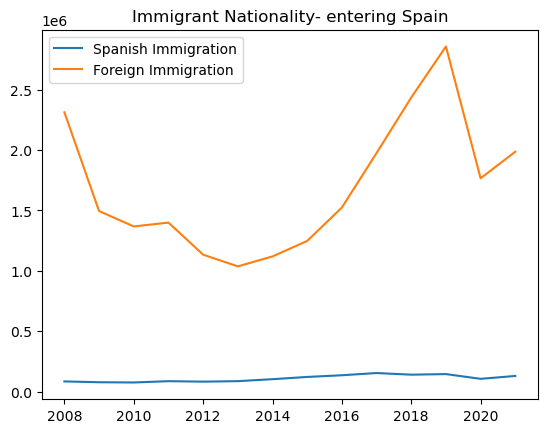

In [36]:
## Visualize immigration data across native and foreign populations

x1 = inm_nacional.columns
y1 = inm_nacional.loc['España', :]
y2 = inm_nacional.loc['Extranjero', :]
y3 = inm_nacional.loc['Total', :]

plt.plot(x1, y1, label='Spanish Immigration')
plt.plot(x1, y2, label='Foreign Immigration')
plt.title('Immigrant Nationality- entering Spain')
plt.legend()
plt.show()

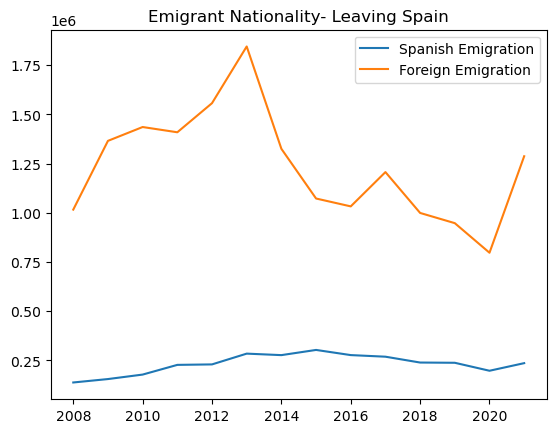

In [37]:
## Visualize emigration data across native and foreign populations

x1 = em_nacional.columns
y1 = em_nacional.loc['España', :]
y2 = em_nacional.loc['Extranjero', :]
y3 = em_nacional.loc['Total', :]

plt.plot(x1, y1, label='Spanish Emigration')
plt.plot(x1, y2, label='Foreign Emigration')
plt.title('Emigrant Nationality- Leaving Spain')
plt.legend()
plt.show()

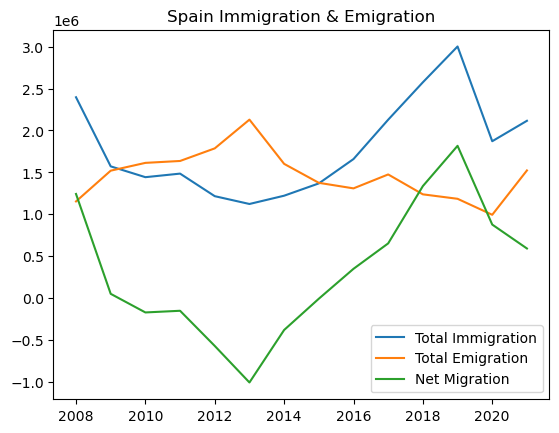

In [38]:
## Visualize total immigration, emigration and net migration over time

x = range(2008, 2022)
y1 = inm_nacional.loc['Total',:]
y2 = em_nacional.loc['Total',:]
y3 = nacional_migracion.loc['Total',:]

plt.plot(x, y1, label = 'Total Immigration')
plt.plot(x, y2, label = 'Total Emigration')
plt.plot(x, y3, label = 'Net Migration')
plt.title('Spain Immigration & Emigration')
plt.legend()
plt.show()

## Should add horizontal line at 0 mark to indicate below and above which the net change line indicates
## a overall increase or decrease in the population

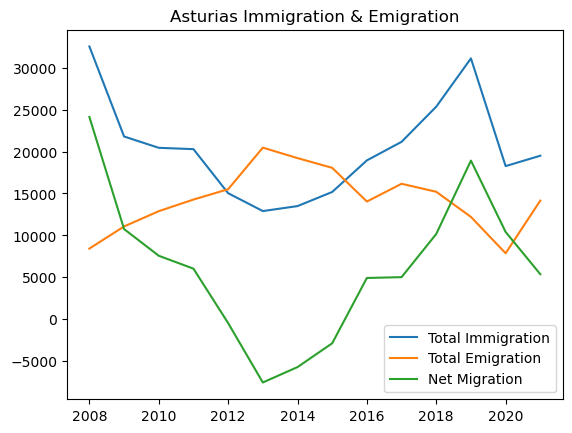

In [39]:
x = range(2008, 2022)
y1 = inm_asturias.loc['Total',:]
y2 = em_asturias.loc['Total',:]
y3 = asturias_migracion.loc['Total',:]

plt.plot(x, y1, label = 'Total Immigration')
plt.plot(x, y2, label = 'Total Emigration')
plt.plot(x, y3, label = 'Net Migration')
plt.title('Asturias Immigration & Emigration')
plt.legend()
plt.show()

<h1> Unemployment Data Prep </h1>

In [40]:
paro.head()

,ï»¿Sexo,Comunidades y Ciudades AutÃ³nomas,Edad,Periodo,Total
0,Ambos sexos,Total Nacional,Total,2023T1,"13,26"
1,Ambos sexos,Total Nacional,Total,2022T4,"12,87"
2,Ambos sexos,Total Nacional,Total,2022T3,"12,67"
3,Ambos sexos,Total Nacional,Total,2022T2,"12,48"
4,Ambos sexos,Total Nacional,Total,2022T1,"13,65"


In [41]:
paro.dtypes

ï»¿Sexo                              object
Comunidades y Ciudades AutÃ³nomas    object
Edad                                 object
Periodo                              object
Total                                object
dtype: object

In [42]:
paro['Edad'].value_counts()

Total                  5100
Menores de 25 aÃ±os    5100
25 y mÃ¡s aÃ±os        5100
De 16 a 19 aÃ±os       5100
De 20 a 24 aÃ±os       5100
De 25 a 54 aÃ±os       5100
55 y mÃ¡s aÃ±os        5100
Name: Edad, dtype: int64

In [43]:
paro['Total'].value_counts()

100      214
..       141
0         95
10,04     25
16,16     24
        ... 
74,17      1
83,96      1
78,49      1
79,16      1
1,39       1
Name: Total, Length: 6967, dtype: int64

In [44]:
paro.rename(columns={paro.columns[1]: "Comunidad" , paro.columns[0]: "Sexo" }, inplace = True)

paro['Comunidad'] = paro['Comunidad'].str[3:]

paro['Total'] = paro['Total'].str.replace(',', '.')

paro['Total'] = paro['Total'].replace('',np.nan, regex=True)

to_remove = {'Ã±':'ñ', 'Ã¡':'á','Ã':'í', 'í³':'ó'}
## Solution: https://favtutor.com/blogs/replace-multiple-characters-in-string-python
for char in to_remove.keys():
    paro['Comunidad'] = paro['Comunidad'].str.replace(char, to_remove[char])
    paro['Edad'] = paro['Edad'].str.replace(char, to_remove[char])

In [45]:
paro_filtered = paro[(paro['Periodo'].str.contains('T1')) & (paro['Sexo'] == 'Ambos sexos') & 
                     ((paro['Edad'] == '25 y más años') | (paro['Edad'] == 'Total'))]

paro_filtered['Total'] = paro_filtered['Total'].astype('float')

/var/folders/kh/5hx4gs090vb178wxzjkx1rtr0000gn/T/ipykernel_32228/1210182217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paro_filtered['Total'] = paro_filtered['Total'].astype('float')


In [46]:
paro_filtered['Total'].value_counts()

10.37    4
11.10    3
13.31    3
9.90     3
14.23    3
        ..
11.82    1
12.42    1
13.91    1
18.33    1
7.55     1
Name: Total, Length: 734, dtype: int64

In [47]:
paro_filtered.head()

,Sexo,Comunidad,Edad,Periodo,Total
0,Ambos sexos,al Nacional,Total,2023T1,13.26
4,Ambos sexos,al Nacional,Total,2022T1,13.65
8,Ambos sexos,al Nacional,Total,2021T1,15.98
12,Ambos sexos,al Nacional,Total,2020T1,14.41
16,Ambos sexos,al Nacional,Total,2019T1,14.70


In [48]:
paro_filtered['Sexo'].value_counts()

Ambos sexos    880
Name: Sexo, dtype: int64

In [49]:
paro_pivot = pd.pivot_table(paro_filtered, values='Total', index=['Comunidad', 'Sexo', 'Edad'],
                    columns=['Periodo'], aggfunc=np.sum)

In [50]:
paro_pivot.head()

Periodo                                            2002T1  2003T1  2004T1  \
Comunidad               Sexo        Edad                                    
Andalucí­a              Ambos sexos 25 y más años   16.92   16.94   15.39   
                                    Total           18.95   19.00   17.15   
Aragón                  Ambos sexos 25 y más años    4.24    6.04    5.68   
                                    Total            5.42    7.38    6.82   
Asturias, Principado de Ambos sexos 25 y más años    7.84   10.42    9.77   

Periodo                                            2005T1  2006T1  2007T1  \
Comunidad               Sexo        Edad                                    
Andalucí­a              Ambos sexos 25 y más años   12.51   11.86   11.10   
                                    Total           14.29   13.31   12.52   
Aragón                  Ambos sexos 25 y más años    5.18    5.09    5.04   
                                    Total            6.16    6.29    5.76   
Asturias, Principado de Ambos sexos 25 y más años    9.72    8.26    8.17   

Periodo                                            2008T1  2009T1  2010T1  \
Comunidad               Sexo        Edad                                    
Andalucí­a              Ambos sexos 25 y más años   12.98   21.46   24.45   
                                    Total           14.78   23.94   27.05   
Aragón                  Ambos sexos 25 y más años    5.08   11.71   13.81   
                                    Total            6.09   13.31   15.24   
Asturias, Principado de Ambos sexos 25 y más años    7.34   10.31   14.88   

Periodo                                            2011T1  ...  2014T1  \
Comunidad               Sexo        Edad                   ...           
Andalucí­a              Ambos sexos 25 y más años   26.75  ...   32.53   
                                    Total           29.37  ...   34.94   
Aragón                  Ambos sexos 25 y más años   16.16  ...   20.77   
                                    Total           18.04  ...   22.85   
Asturias, Principado de Ambos sexos 25 y más años   16.55  ...   21.43   

Periodo                                            2015T1  2016T1  2017T1  \
Comunidad               Sexo        Edad                                    
Andalucí­a              Ambos sexos 25 y más años   31.63   27.32   24.94   
                                    Total           33.62   29.70   26.94   
Aragón                  Ambos sexos 25 y más años   16.83   14.25   11.87   
                                    Total           18.59   15.28   13.32   
Asturias, Principado de Ambos sexos 25 y más años   17.94   17.99   13.47   

Periodo                                            2018T1  2019T1  2020T1  \
Comunidad               Sexo        Edad                                    
Andalucí­a              Ambos sexos 25 y más años   23.08   19.62   19.51   
                                    Total           24.74   21.08   21.21   
Aragón                  Ambos sexos 25 y más años   10.28    9.32   10.04   
                                    Total           11.58   10.50   10.64   
Asturias, Principado de Ambos sexos 25 y más años   13.89   14.37   13.78   

Periodo                                            2021T1  2022T1  2023T1  
Comunidad               Sexo        Edad                                   
Andalucí­a              Ambos sexos 25 y más años   20.70   18.28   16.97  
                                    Total           22.54   19.43   18.31  
Aragón                  Ambos sexos 25 y más años   10.62    9.46    8.24  
                                    Total           12.10   10.14    8.94  
Asturias, Principado de Ambos sexos 25 y más años   13.35   11.40   12.44  

[5 rows x 22 columns]

In [59]:
paro_pivot.xs(('Asturias, Principado de', 'Ambos sexos', 'Total'))
## Found: https://stackoverflow.com/questions/24435788/using-loc-with-a-multiindex-in-pandas
## Explanation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html

Periodo
2002T1     9.15
2003T1    12.44
2004T1    11.46
2005T1    11.18
2006T1    10.06
2007T1     9.44
2008T1     8.56
2009T1    12.07
2010T1    16.60
2011T1    18.16
2012T1    20.52
2013T1    25.51
2014T1    22.75
2015T1    18.99
2016T1    19.50
2017T1    14.23
2018T1    15.02
2019T1    15.03
2020T1    14.37
2021T1    14.09
2022T1    11.97
2023T1    13.06
Name: (Asturias, Principado de, Ambos sexos, Total), dtype: float64

<h2> Unemployment Data Viz </h2>

<h1> Visualisation </h1>

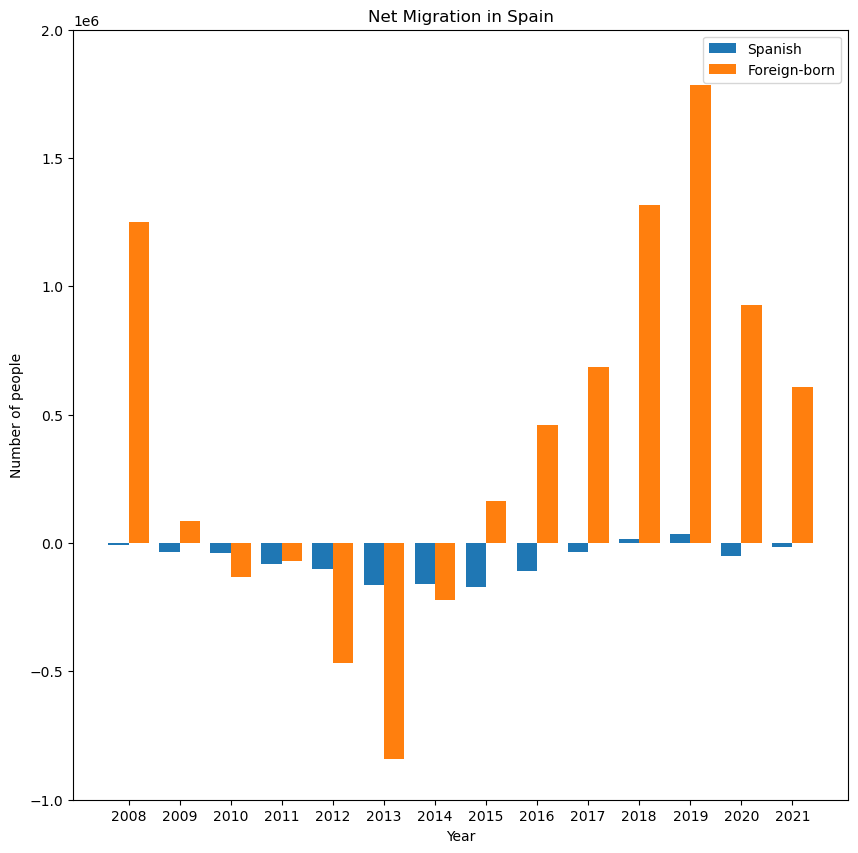

In [51]:
## Migration data

## CHANGE TO LINE GRAPH
## CHANGE DATA TO FLUJOS DATASETS + SALDO MIGRATORIO AS EXTRA

# fig, ax = plt.subplots(figsize=(15,4), nrows=2, ncols=1);

# National level

x1 = nacional_migracion.columns
y1 = nacional_migracion.loc['Española', :]
y2 = nacional_migracion.loc['Extranjera', :]
y3 = nacional_migracion.loc['Total', :]

x1_axis = np.arange(len(x1))

plt.figure(figsize=(10,10))
  
plt.bar(x1_axis - 0.2, y1, 0.4, label = 'Spanish')
plt.bar(x1_axis + 0.2, y2, 0.4, label = 'Foreign-born')
# plt.bar(x1_axis + 0.4, y3, 0.4, label = 'Total')
plt.plot

# ax[0].bar(x=x1, height, width=0.8, data=y1)
# ax[0].bar(x=x1, height, width=0.8, data=y2)
  
plt.xticks(x1_axis, x1)
plt.xlabel("Year")
plt.ylim(-1000000, 2000000)
plt.ylabel("Number of people")
plt.title("Net Migration in Spain")
plt.legend()
plt.show()


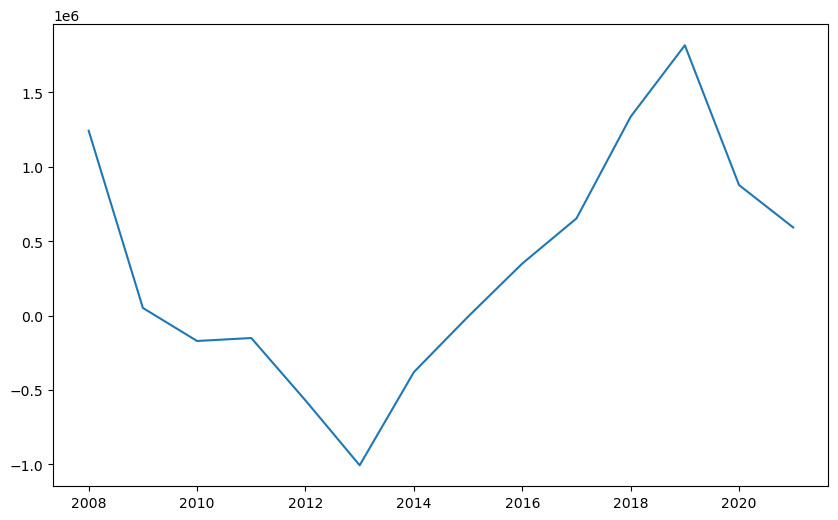

In [52]:
plt.figure(figsize=(10,6))

plt.plot(x1, y3)

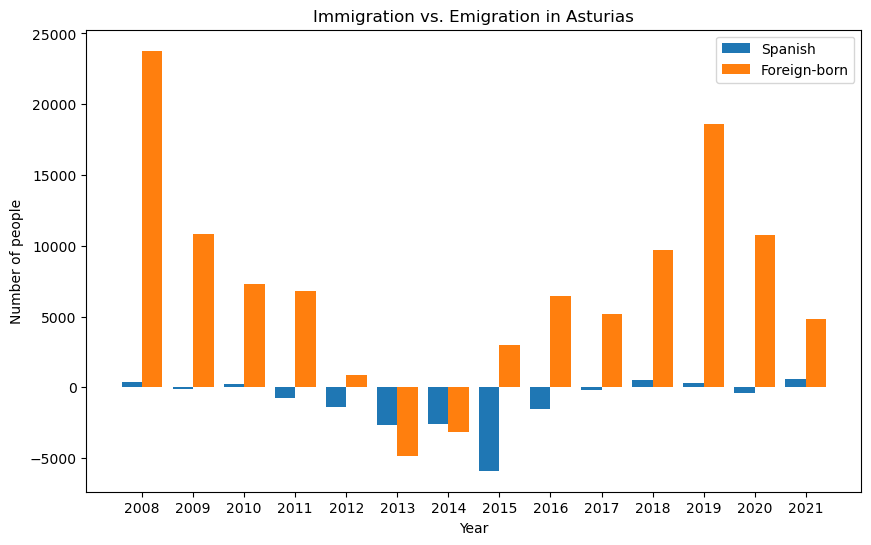

In [53]:
## Migration data

## Asturias

x2 = asturias_migracion.columns
z1 = asturias_migracion.loc['Española', :]
z2 = asturias_migracion.loc['Extranjera', :]
z3 = asturias_migracion.loc['Total', :]

x2_axis = np.arange(len(x2))

plt.figure(figsize=(10,6))
  
plt.bar(x2_axis - 0.2, z1, 0.4, label = 'Spanish')
plt.bar(x2_axis + 0.2, z2, 0.4, label = 'Foreign-born')
# plt.bar(x2_axis + 0.4, z2, 0.4, label = 'Total')

plt.xticks(x2_axis, x2)
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.title("Immigration vs. Emigration in Asturias")
plt.legend()
plt.show()

<h1> Old Exploration </h1>

In [54]:
variable3_list = list(s_national['Variable3'].unique())

len(variable3_list)

variable3_list[1]

'Fenómeno demográfico'

In [55]:
variable3_frames = []

for category in s_national['Variable3'].unique():
    frame = s_national[s_national['Variable3'] == category]
    variable3_frames.append(frame)
    
for i in range(len(variable3_list)):
    print(variable3_list[i])
    

Total Nacional
Fenómeno demográfico
Conceptos Demográficos
Nacionalidad
Conceptos salariales/laborales
nan
Cambios de conceptos
Relación con la justicia


In [56]:
demographic = variable3_frames[2]

demographic.drop(['Variable1','Valor1','Variable4','Valor4','Variable5','Variable6','Variable7','Valor7','Variable8','Valor8'], axis=1, inplace=True)



/var/folders/kh/5hx4gs090vb178wxzjkx1rtr0000gn/T/ipykernel_32228/1426537124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic.drop(['Variable1','Valor1','Variable4','Valor4','Variable5','Variable6','Variable7','Valor7','Variable8','Valor8'], axis=1, inplace=True)


In [57]:
demographic

## Hierarchy of variables is not logical
## Should change to Variable3, Valor3, Variable2, Valor2, Valor5, Valor 6, VALOR
## PERIODO column should be pivoted so that each value in the series is a separate column

,Variable2,Valor2,Variable3,Valor3,Valor5,Valor6,PERIODO,VALOR
25,Nacionalidad,Total,Conceptos Demográficos,Flujo de inmigraciones procedentes del extranjero,Todas las edades,Total,2022S1,478.990
26,Nacionalidad,Total,Conceptos Demográficos,Flujo de inmigraciones procedentes del extranjero,Todas las edades,Total,2021S2,327.527
27,Nacionalidad,Total,Conceptos Demográficos,Flujo de inmigraciones procedentes del extranjero,Todas las edades,Total,2021S1,201.329
28,Nacionalidad,Total,Conceptos Demográficos,Flujo de inmigraciones procedentes del extranjero,Todas las edades,Total,2020S2,219.889
29,Nacionalidad,Total,Conceptos Demográficos,Flujo de inmigraciones procedentes del extranjero,Todas las edades,Total,2020S1,248.029
30,Nacionalidad,Total,Conceptos Demográficos,Flujo de emigraciones con destino el extranjero,Todas las edades,Total,2022S1,220.443
31,Nacionalidad,Total,Conceptos Demográficos,Flujo de emigraciones con destino el extranjero,Todas las edades,Total,2021S2,183.410
32,Nacionalidad,Total,Conceptos Demográficos,Flujo de emigraciones con destino el extranjero,Todas las edades,Total,2021S1,197.376
33,Nacionalidad,Total,Conceptos Demográficos,Flujo de emigraciones con destino el extranjero,Todas las edades,Total,2020S2,118.148
34,Nacionalidad,Total,Conceptos Demográficos,Flujo de emigraciones con destino el extranjero,Todas las edades,Total,2020S1,130.413
